In [1]:
import pandas as pd

# 指定文件路径
file_path = '/Users/mac/Rprojecy/R-vs-python/data/gapminder.csv'

# 从文件加载数据
df = pd.read_csv(file_path)

# 显示数据的前几行以检查
print(df.head())

       country continent  year  lifeExp       pop  gdpPercap
0  Afghanistan      Asia  2007     43.8  31889923      975.0
1      Albania    Europe  2007     76.4   3600523     5937.0
2      Algeria    Africa  2007     72.3  33333216     6223.0
3       Angola    Africa  2007     42.7  12420476     4797.0
4    Argentina  Americas  2007     75.3  40301927    12779.0


In [2]:
# 2. 过滤数据 - 筛选亚洲国家的数据
asia_countries = df[df['continent'] == 'Asia']


In [3]:
# 3. 查找数据 - 查找特定国家（例如"Belgium"）的数据
belgium_data = df[df['country'] == 'Belgium']

# 4. 统计 - 计算生命期望、人口和人均GDP的基本统计数据
statistics = df[['lifeExp', 'pop', 'gdpPercap']].describe()

asia_countries, belgium_data, statistics

(       country continent  year  lifeExp        pop  gdpPercap
 0  Afghanistan      Asia  2007     43.8   31889923      975.0
 7      Bahrain      Asia  2007     75.6     708573    29796.0
 8   Bangladesh      Asia  2007     64.1  150448339     1391.0,
    country continent  year  lifeExp       pop  gdpPercap
 9  Belgium    Europe  2007     79.4  10392226    33693.0,
          lifeExp           pop     gdpPercap
 count  35.000000  3.500000e+01     35.000000
 mean   72.308657  3.433144e+07  12606.508304
 std     8.565192  6.227100e+07  11511.746528
 min    42.700000  3.196220e+05    975.000000
 25%    71.586500  4.904620e+06   5457.201759
 50%    73.747000  1.141699e+07   8948.102923
 75%    77.321000  3.261157e+07  12975.509245
 max    81.200000  3.011399e+08  42951.653090)

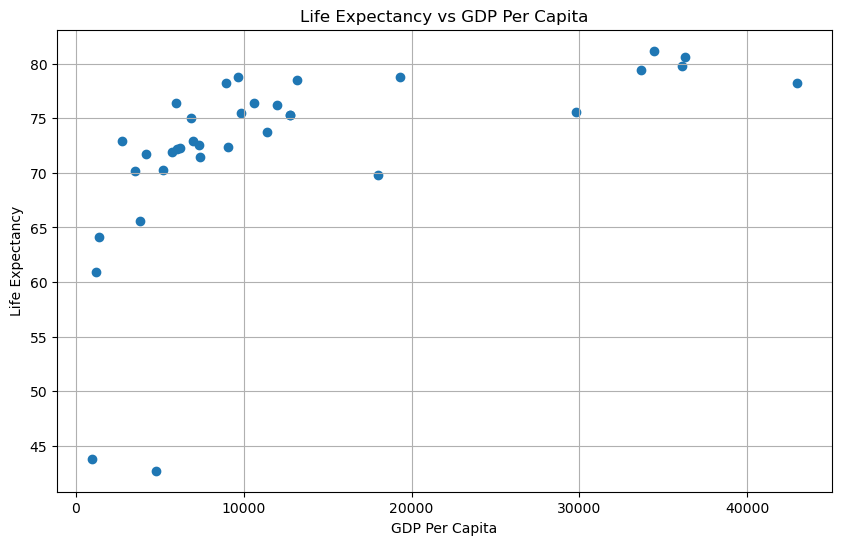

In [4]:
import matplotlib.pyplot as plt

# 创建生命期望与人均GDP的散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['gdpPercap'], df['lifeExp'])
plt.title('Life Expectancy vs GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

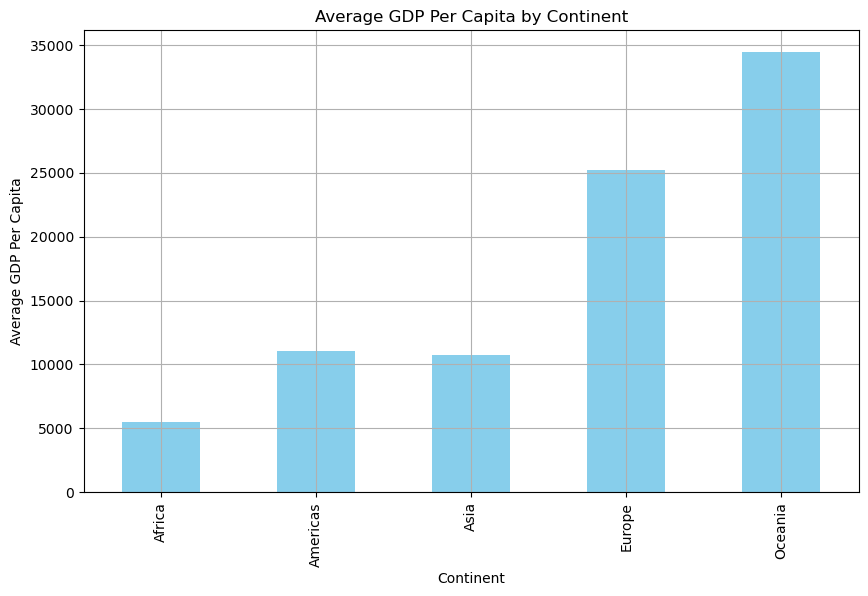

In [5]:
# 计算各大洲的平均人均GDP
avg_gdp_per_continent = df.groupby('continent')['gdpPercap'].mean()

# 创建各大洲的平均人均GDP条形图
plt.figure(figsize=(10, 6))
avg_gdp_per_continent.plot(kind='bar', color='skyblue')
plt.title('Average GDP Per Capita by Continent')
plt.xlabel('Continent')
plt.ylabel('Average GDP Per Capita')
plt.grid(True)
plt.show()

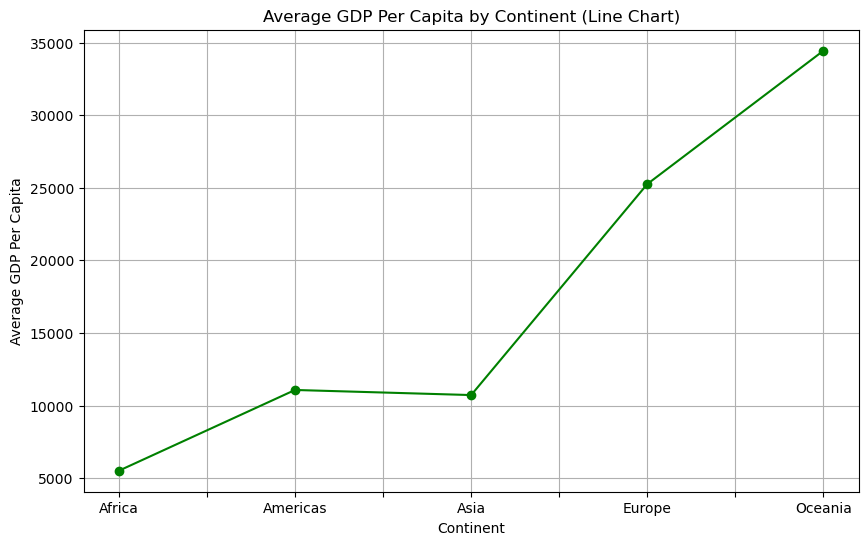

In [6]:
# 创建各大洲的平均人均GDP折线图
plt.figure(figsize=(10, 6))
avg_gdp_per_continent.plot(kind='line', color='green', marker='o')
plt.title('Average GDP Per Capita by Continent (Line Chart)')
plt.xlabel('Continent')
plt.ylabel('Average GDP Per Capita')
plt.grid(True)
plt.show()

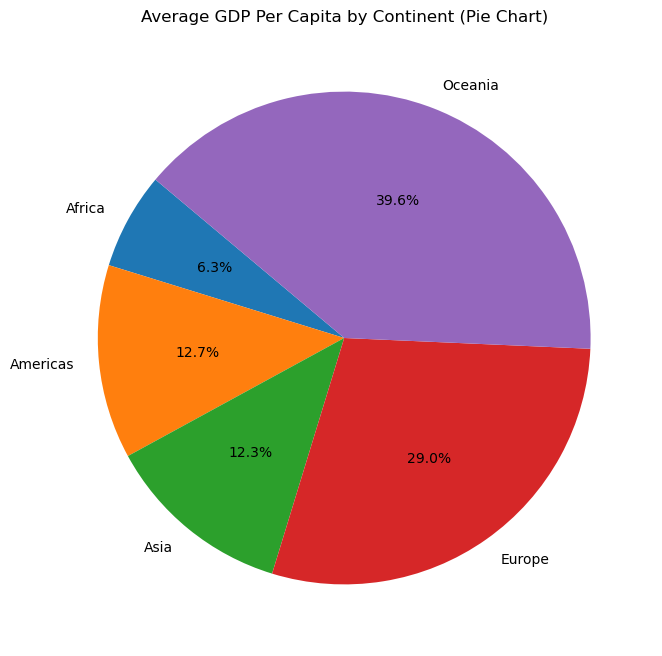

In [7]:
# 创建各大洲的平均人均GDP饼图
plt.figure(figsize=(8, 8))
plt.pie(avg_gdp_per_continent, labels=avg_gdp_per_continent.index, autopct='%1.1f%%', startangle=140)
plt.title('Average GDP Per Capita by Continent (Pie Chart)')
plt.show()


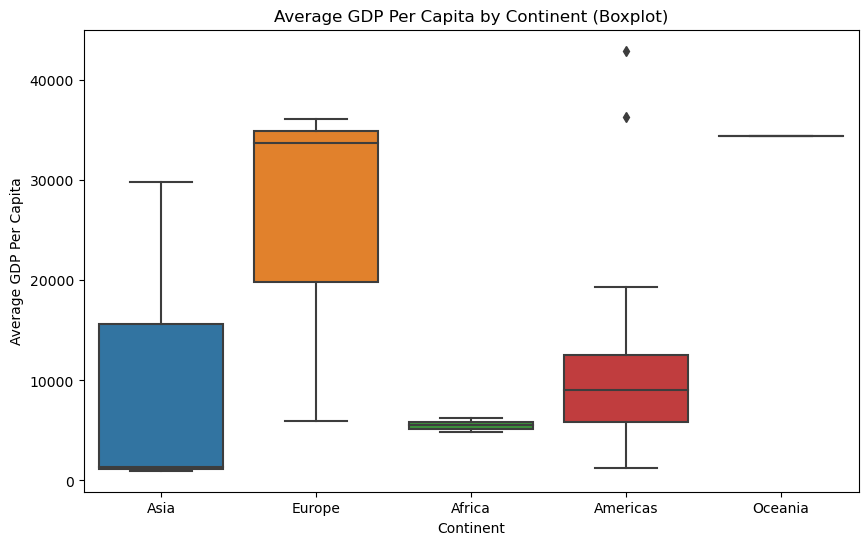

In [8]:
import seaborn as sns

# 创建各大洲的平均人均GDP箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='gdpPercap', data=df)
plt.title('Average GDP Per Capita by Continent (Boxplot)')
plt.xlabel('Continent')
plt.ylabel('Average GDP Per Capita')
plt.show()

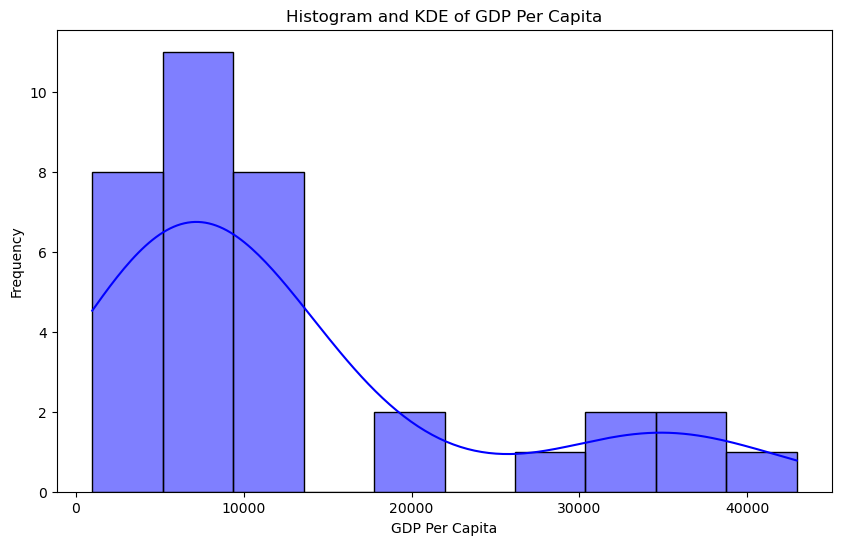

In [11]:
# 由于直方图和核密度图通常用于展示单个变量的分布，而不是分组的平均值，
# 我们将展示整体数据的直方图和核密度图，而不是按大洲分组的平均值
plt.figure(figsize=(10, 6))
sns.histplot(df['gdpPercap'], kde=True, color='blue')
plt.title('Histogram and KDE of GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency')
plt.show()

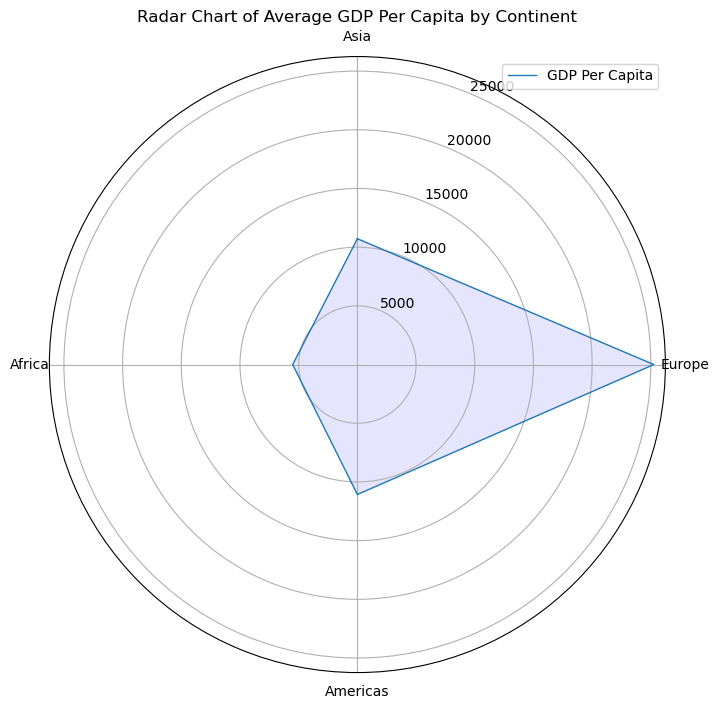

In [8]:
from math import pi

# 准备雷达图数据
# 选择几个代表性的大洲进行比较
selected_continents = ['Asia', 'Europe', 'Americas', 'Africa']
radar_data = df[df['continent'].isin(selected_continents)].groupby('continent')['gdpPercap'].mean().reindex(selected_continents)

# 计算雷达图的角度
num_vars = len(selected_continents)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # 确保闭合

# 绘制雷达图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)  # 设置起始角度
ax.set_theta_direction(-1)   # 设置角度方向

plt.xticks(angles[:-1], selected_continents)

# 绘制雷达图的每个轴上的数据
values = radar_data.tolist()
values += values[:1]  # 确保闭合
ax.plot(angles, values, linewidth=1, linestyle='solid', label='GDP Per Capita')
ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Radar Chart of Average GDP Per Capita by Continent')
plt.legend(loc='upper right')
plt.show()

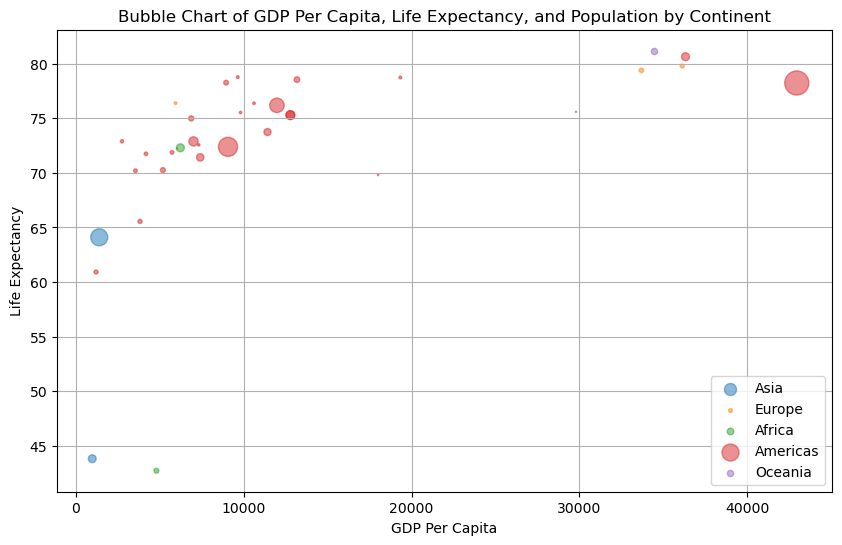

In [9]:
# 创建气泡图
plt.figure(figsize=(10, 6))
for continent in df['continent'].unique():
    continent_data = df[df['continent'] == continent]
    plt.scatter(continent_data['gdpPercap'], continent_data['lifeExp'], 
                s=continent_data['pop'] / 1000000, # 将人口除以一个数以减小气泡大小
                alpha=0.5, label=continent)

plt.title('Bubble Chart of GDP Per Capita, Life Expectancy, and Population by Continent')
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

# 注意：由于人口的差异很大，为了使气泡大小合理，对人口数据进行了缩放处理。

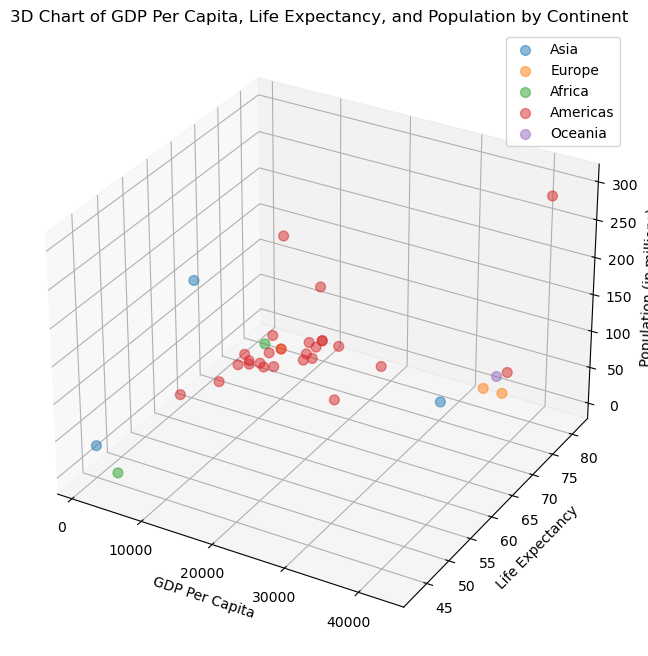

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# 创建3D图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for continent in df['continent'].unique():
    continent_data = df[df['continent'] == continent]
    ax.scatter(continent_data['gdpPercap'], continent_data['lifeExp'], continent_data['pop'] / 1000000, 
               s=50, alpha=0.5, label=continent)

ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Life Expectancy')
ax.set_zlabel('Population (in millions)')
plt.title('3D Chart of GDP Per Capita, Life Expectancy, and Population by Continent')
plt.legend()
plt.show()

# 注意：为了在3D空间中清晰展示，对人口数据进行了缩放处理。
